In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df=pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Columns : cut, color and clarity are categorical columns whereas others are numerical.

In [6]:
# Function for univariate categorical plot

In [7]:
def draw_catplot(col_name,dataframe):
    print('Number of Categories : ', dataframe[col_name].nunique())
    print('Different Categories in column ' , col_name , ' are :')
    for i in dataframe[col_name].unique():
        print(i)
    if(df[col_name].nunique()>=15):
        fig,ax=plt.subplots(figsize=(22,7))
    else: 
        fig,ax=plt.subplots(figsize=(17,7))
    sns.countplot(x=col_name,data=dataframe)
    ax.bar_label(ax.containers[0])
    plt.show()

Number of Categories :  5
Different Categories in column  cut  are :
Ideal
Premium
Good
Very Good
Fair


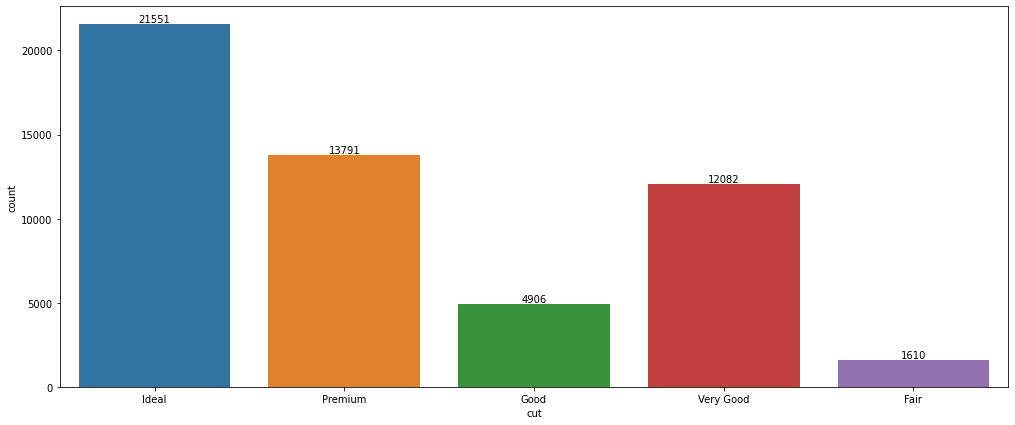

In [8]:
draw_catplot('cut',df)

Around 21551 diamonds come under Ideal cut category which comprises of majority of the diamonds. Next most popular category of cut in diamonds is Premium.

Number of Categories :  7
Different Categories in column  color  are :
E
I
J
H
F
G
D


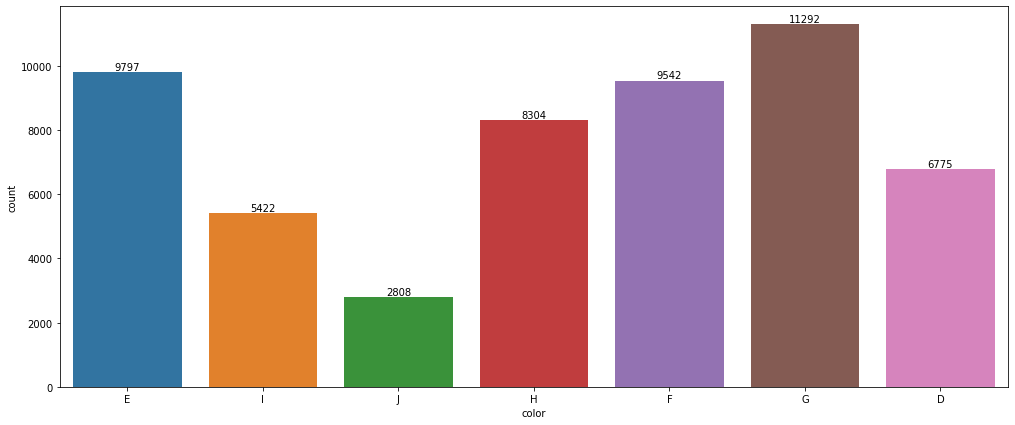

In [9]:
draw_catplot('color',df)

Most of the diamonds are of 'G' color followed by 'E' color.

Number of Categories :  8
Different Categories in column  clarity  are :
SI2
SI1
VS1
VS2
VVS2
VVS1
I1
IF


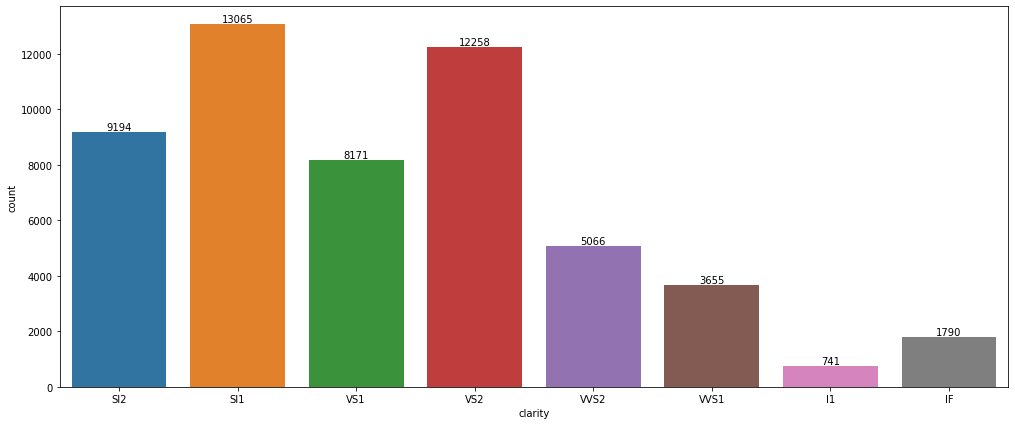

In [10]:
draw_catplot('clarity',df)

Majority of the diamonds comprises of Clarity : SI1 followed by VS2.

In [11]:
def draw_univar(col_name,dataframe):
    fig,axes=plt.subplots(1,2,figsize=(20,7))
    sns.histplot(x=col_name, data=dataframe, ax=axes[0],bins=30, kde=True).set(title='Histogram of : ' + col_name)
    
    sns.boxplot(x=col_name, data=dataframe, ax=axes[1]).set(title='Boxplot of : ' + col_name)


In [12]:
num_col=[i for i in df.columns if df[i].dtype!='object']
num_col

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

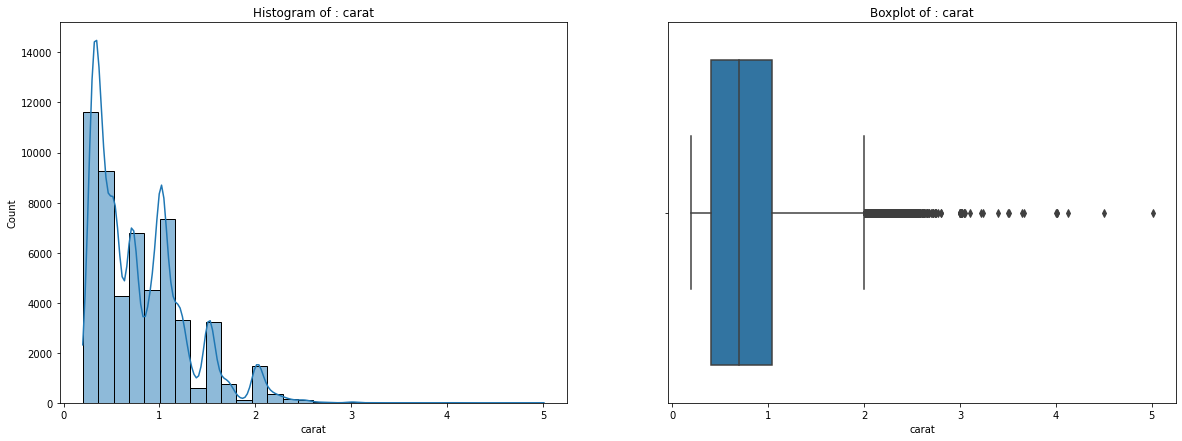

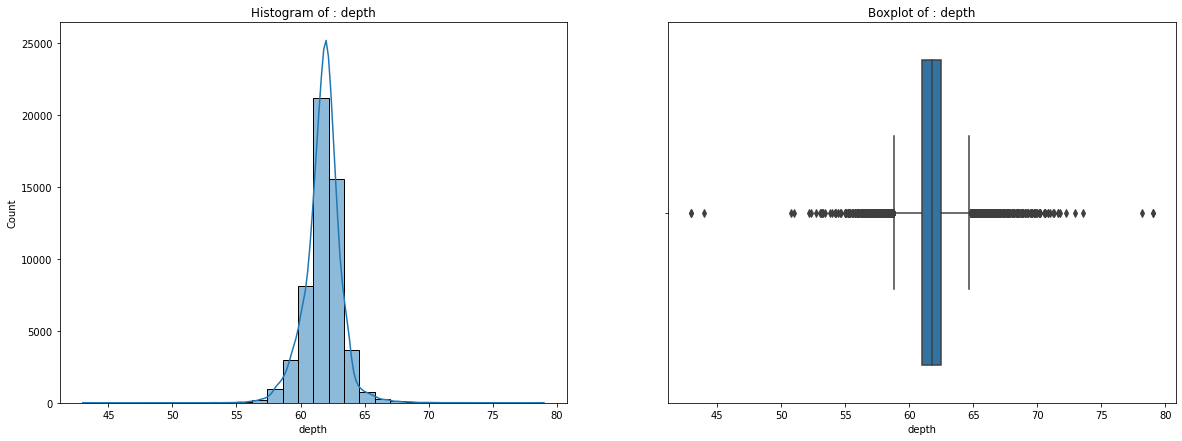

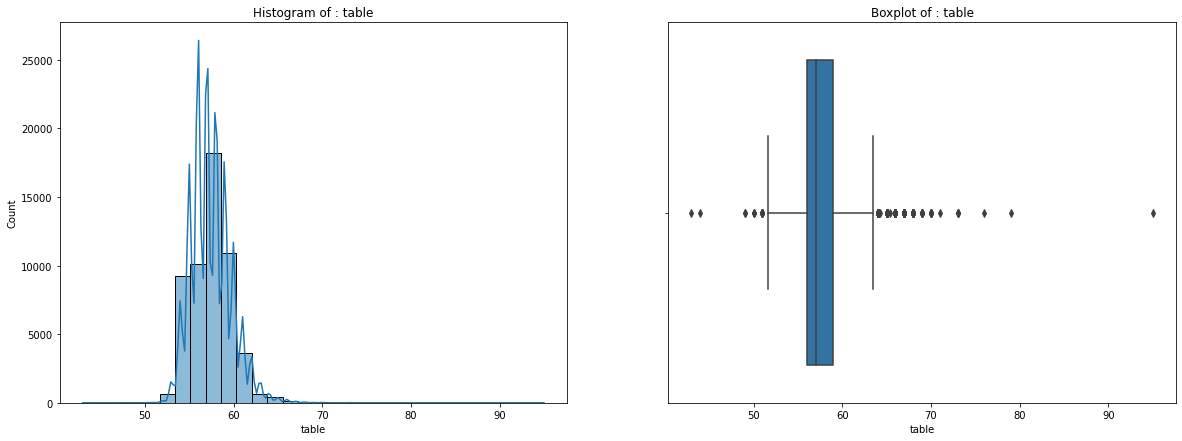

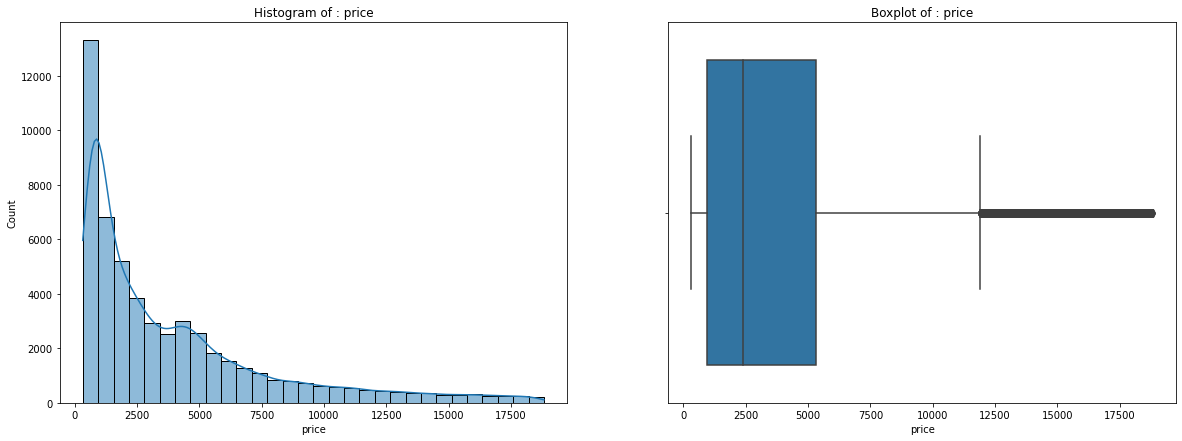

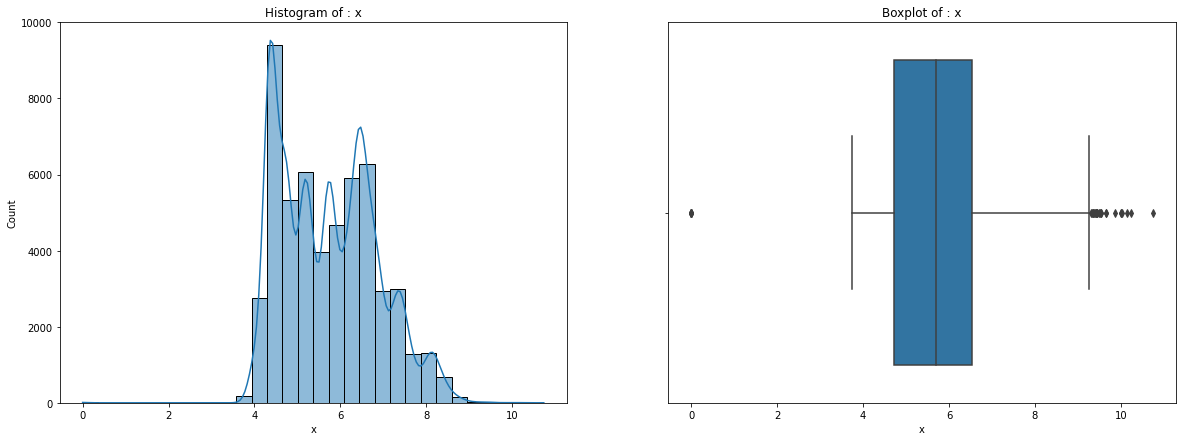

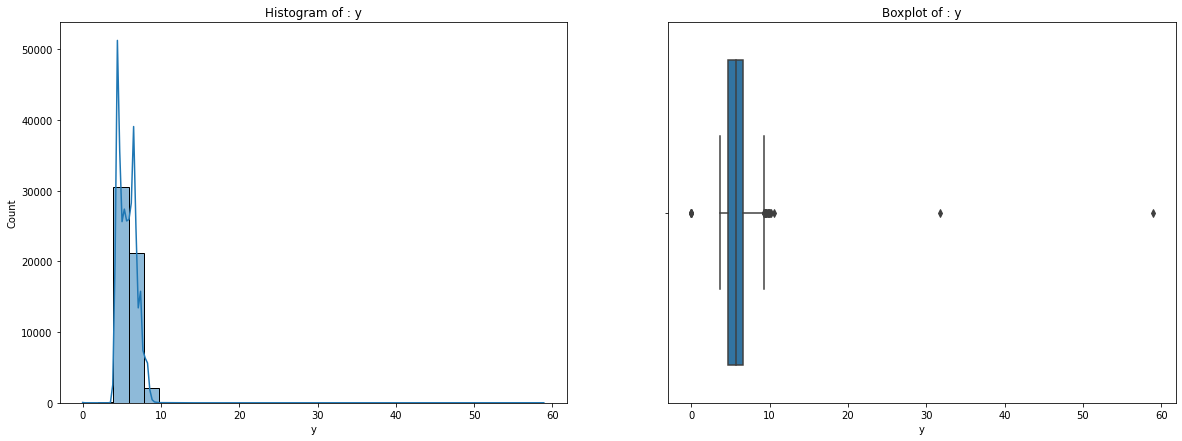

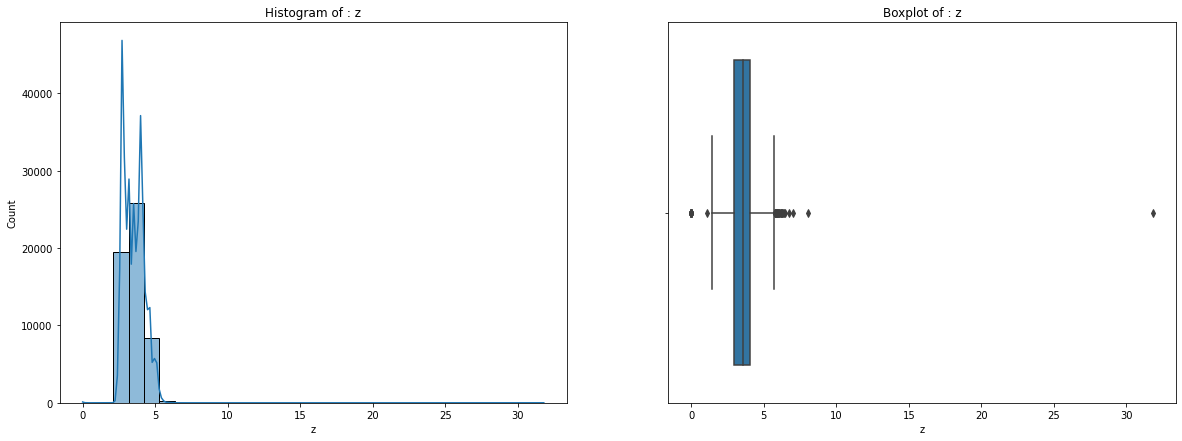

In [13]:
for i in num_col:
    draw_univar(i,df)

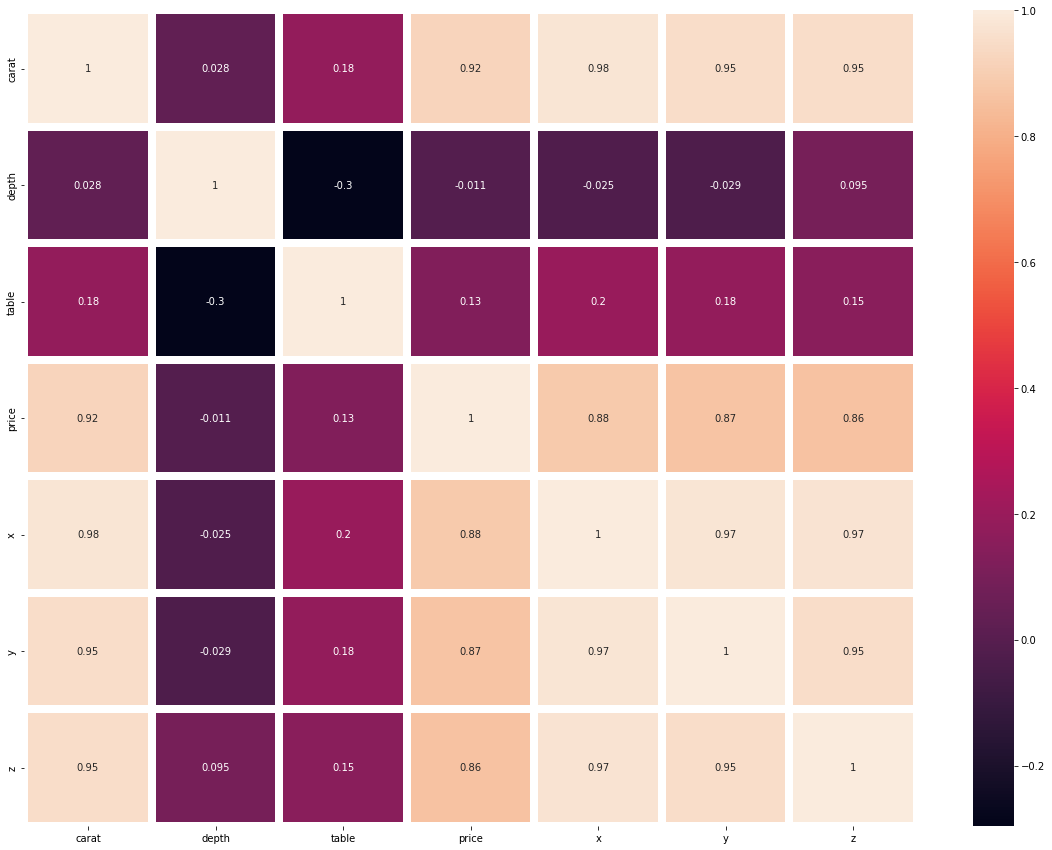

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,linewidths=8)
plt.show()

We observed that columns : carat,x,y,& z have high correlation with Price.

Color vs Price

Color of the diamond, with D being the best and J the worst

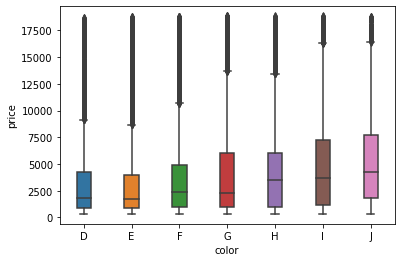

In [15]:
sns.boxplot(y='price',data=df,x='color',width =0.3,order = ['D','E','F','G','H','I','J'])
plt.show()

We can observe from the plot above that the colours G, H, I, and J have fewer outliers than D and E. It implies that, with the exception of G type colour, the higher the outliers, the greater the colour quality. Also, the maximum and lowest prices are the same for each category type.

Cut vs Price

Quality in increasing order Fair, Good, Very Good, Premium, Ideal

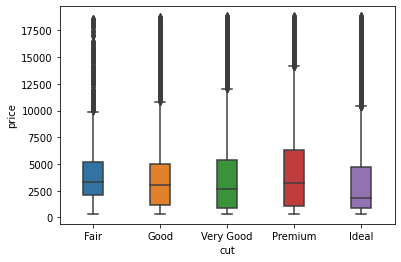

In [16]:
sns.boxplot(y='price',data=df,x='cut',width =0.3, order=['Fair','Good','Very Good','Premium','Ideal'])
plt.show()

With the exception of the ideal cut type, the above plot shows that the frequency of outliers decreases as cut quality increases.

Clarity vs Price

In order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1,

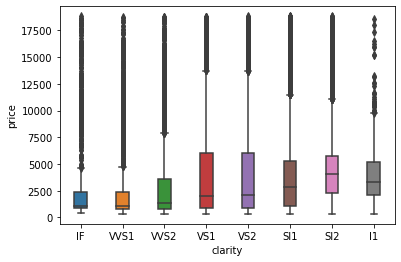

In [17]:
sns.boxplot(y='price',data=df,x='clarity',width =0.3, order=['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'])
plt.show()

From the above plot, we can see that IF, VVS1 and VVS2 have a high number of outliers compared to other categories of color.

# Handling NULL Values

In [18]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

No null values present.

# Handling Categorical Variables

Columns : Color,cut & clarity  are ordinal. Means they have comparable categories or their categories can be compared among themselves and can be ranked. 

We will make a new column and will assign the values according to the importance of the category. Means, Higher value column will have high importance.

In [19]:
df['clarity_marks']=df['clarity'].replace(['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'],[i for i in range(1,9)])
df['color_marks'] = df['color'].replace(['D','E','F','G','H','I','J'],[7,6,5,4,3,2,1])
df['cut_marks'] = df['cut'].replace(['Ideal','Premium','Very Good','Good','Fair'],[5,4,3,2,1])

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_marks,color_marks,cut_marks
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,7,6,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,6,6,4
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,6,2
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5,2,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,7,1,2


In [20]:
df1=df.copy()

In [21]:
y=df1['price']
x=df1.drop(columns=['cut','color','clarity','price'],axis=1)

In [22]:
x

,carat,depth,table,x,y,z,clarity_marks,color_marks,cut_marks
0,0.23,61.5,55.0,3.95,3.98,2.43,7,6,5
1,0.21,59.8,61.0,3.89,3.84,2.31,6,6,4
2,0.23,56.9,65.0,4.05,4.07,2.31,4,6,2
3,0.29,62.4,58.0,4.20,4.23,2.63,5,2,4
4,0.31,63.3,58.0,4.34,4.35,2.75,7,1,2
...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,6,7,5
53936,0.72,63.1,55.0,5.69,5.75,3.61,6,7,2
53937,0.70,62.8,60.0,5.66,5.68,3.56,6,7,3
53938,0.86,61.0,58.0,6.15,6.12,3.74,7,3,4


In [23]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

# Column Transformation

In [24]:
for i in x.columns:
    print( 'Column : ', i , ' Skweness : ', df[i].skew())
    

Column :  carat  Skweness :  1.116645920812613
Column :  depth  Skweness :  -0.08229402630189467
Column :  table  Skweness :  0.7968958486695427
Column :  x  Skweness :  0.3786763426463927
Column :  y  Skweness :  2.4341667164885554
Column :  z  Skweness :  1.5224225590685583
Column :  clarity_marks  Skweness :  -0.5514375416590613
Column :  color_marks  Skweness :  -0.18936591070095682
Column :  cut_marks  Skweness :  -0.7171804565507098


We should try to make skewness =0 of each column.

In [25]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)

In [26]:
x_copy=x.copy()

Since we have min value 0 in mnay columns  so we will add very small vlaues in them to avoid division by 0.

In [27]:
x_copy_transformed= power.fit_transform(x_copy+0.0000001)

In [28]:
x_copy_transformed

array([[-1.70684588, -0.18047935, -1.17337515, ...,  1.35789036,
         0.93959232,  1.07250835],
       [-1.8159425 , -1.35592485,  1.50719771, ...,  0.61389715,
         0.93959232, -0.06292108],
       [-1.70684588, -3.31824724,  2.66541689, ..., -0.67305853,
         0.93959232, -1.5718907 ],
       ...,
       [ 0.0462695 ,  0.730745  ,  1.15239327, ...,  0.61389715,
         1.55245919, -0.93885705],
       [ 0.420192  , -0.5281072 ,  0.34415492, ...,  1.35789036,
        -0.8374247 , -0.06292108],
       [ 0.17139435,  0.3088568 , -1.17337515, ...,  1.35789036,
         1.55245919,  1.07250835]])

In [29]:
x_copy_transformed= pd.DataFrame(x_copy_transformed, columns= x_copy.columns)
x_copy_transformed

,carat,depth,table,x,y,z,clarity_marks,color_marks,cut_marks
0,-1.706846,-0.180479,-1.173375,-1.750006,-1.745718,-1.722456,1.357890,0.939592,1.072508
1,-1.815942,-1.355925,1.507198,-1.821229,-1.918765,-1.943886,0.613897,0.939592,-0.062921
2,-1.706846,-3.318247,2.665417,-1.633005,-1.637044,-1.943886,-0.673059,0.939592,-1.571891
3,-1.402287,0.449235,0.344155,-1.461349,-1.448560,-1.367432,-0.064321,-1.402500,-0.062921
4,-1.307720,1.084044,0.344155,-1.305105,-1.310972,-1.162215,1.357890,-1.947568,-1.571891
...,...,...,...,...,...,...,...,...,...
53935,0.097302,-0.666714,-0.116598,0.091372,0.106418,0.008434,0.613897,1.552459,1.072508
53936,0.097302,0.942537,-1.173375,0.037547,0.097456,0.166107,0.613897,1.552459,-1.571891
53937,0.046269,0.730745,1.152393,0.010472,0.034346,0.094832,0.613897,1.552459,-0.938857
53938,0.420192,-0.528107,0.344155,0.439594,0.420450,0.348432,1.357890,-0.837425,-0.062921


In [30]:
def show_bef_after_powertransform(col_name):
    
    fig,ax =plt.subplots(1 ,2 ,figsize=[15,5])
    
    sns.histplot(x_copy[col_name], bins=20,ax=ax[0], kde=True).set(title= ('Before Power transformation of column : '+ col_name + ' Skew: ' + str ( np.round(x_copy[col_name].skew(),3))) )
    
    #plt.title('Before Power transformation of column : '+ col_name + ' Skew: ' + str ( np.round(dataframe[col_name].skew(),3)) )

    
    #plt.subplot(1,2,2)
    
    #dataframe[col_name + '_log'] = np.log(dataframe[col_name])
    #dataframe[col_name + '_power']=power_col

    sns.histplot(x_copy_transformed[col_name], bins=20,ax=ax[1],kde=True).set(title= ('After Power transformation of column : '+ col_name + ' Skew: ' + str ( np.round(x_copy_transformed[col_name].skew(),3))))

    #plt.title(f'After Log transformation of column : '+ col_name +' Skew: '+ str ( np.round(dataframe[col_name +'_log'].skew(),3)) )
    plt.show()

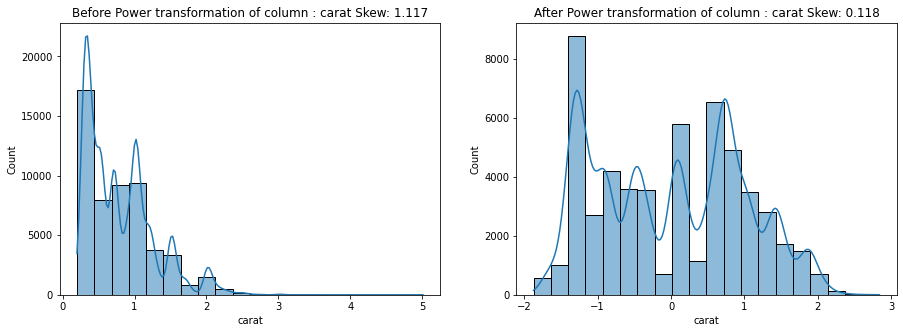

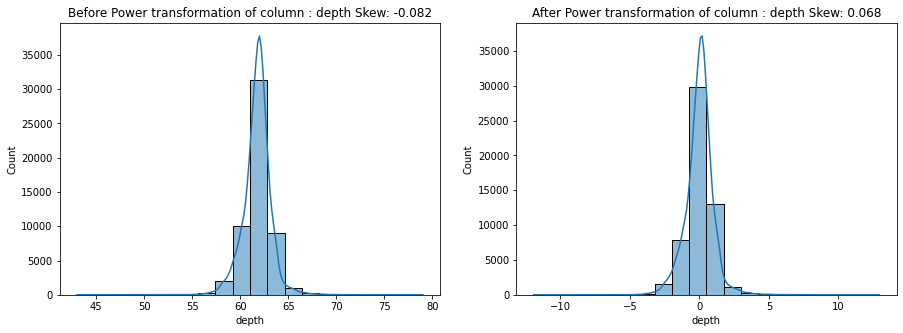

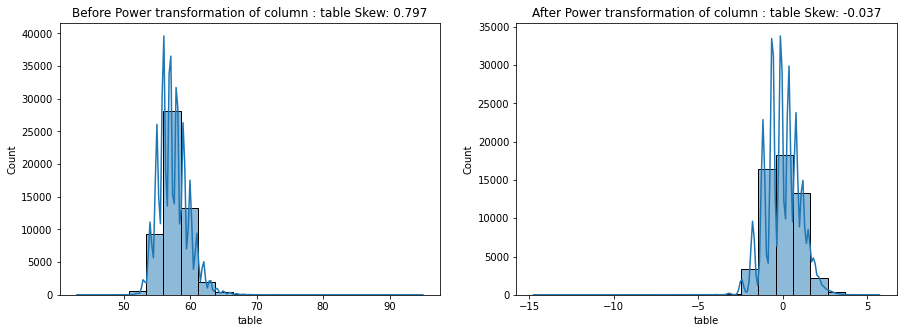

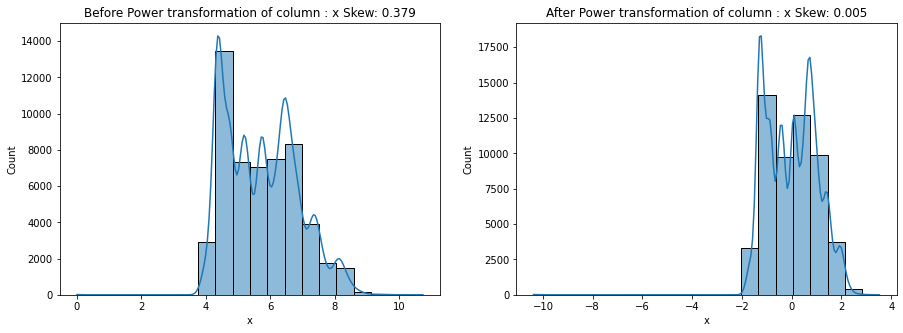

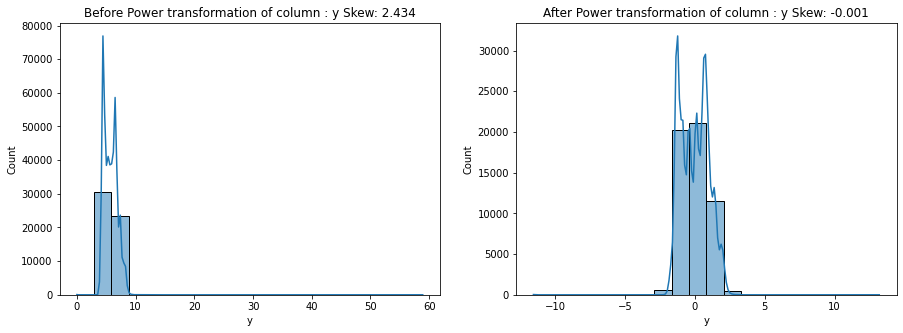

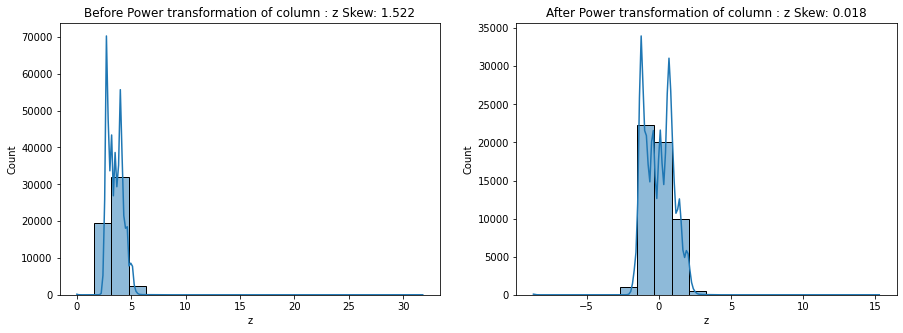

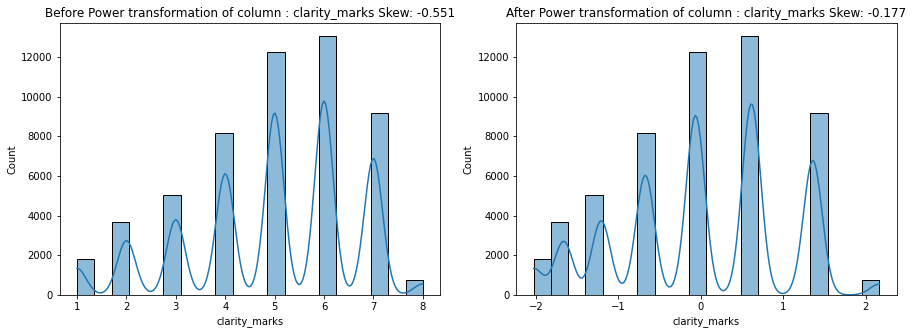

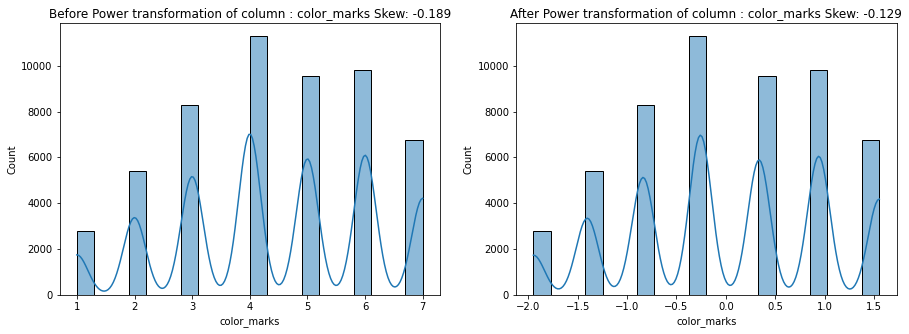

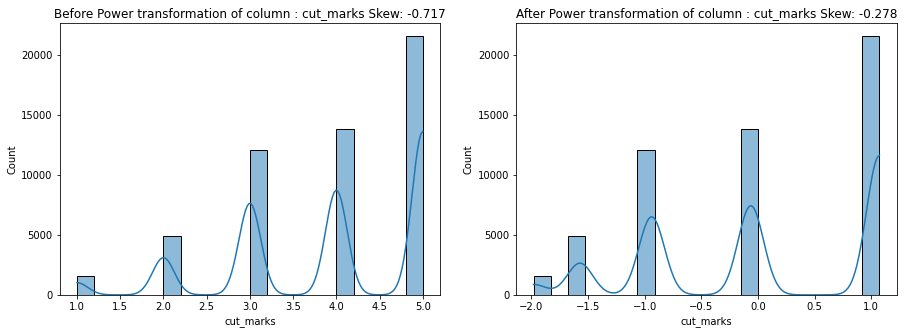

In [31]:
for i in x_copy.columns:
    show_bef_after_powertransform(i)


# Handling Outliers

In [32]:
x_copy_transformed.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity_marks',
       'color_marks', 'cut_marks'],
      dtype='object')

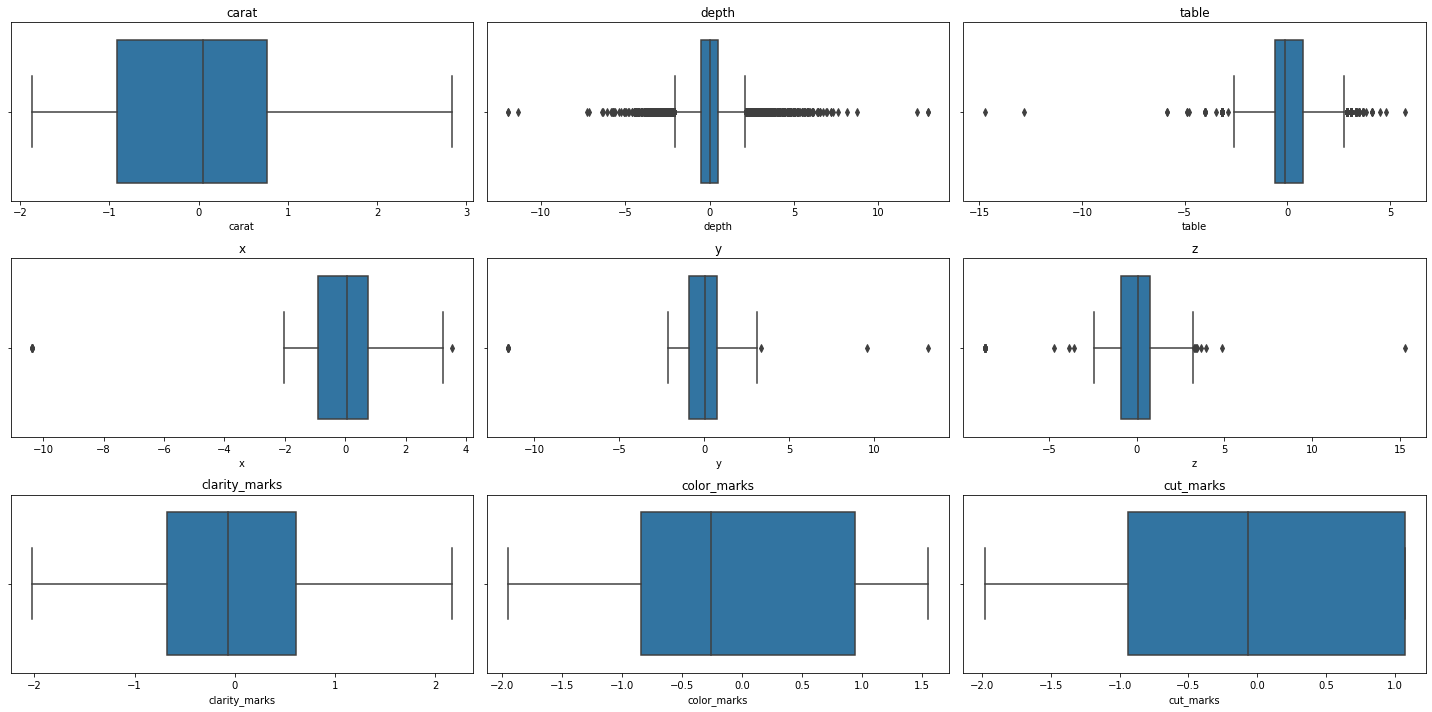

In [35]:
fig,ax=plt.subplots(3,3,figsize=(20,10))
i=0
cnt=0
while i<len(x_copy_transformed.columns):
    
    sns.boxplot(x=x_copy_transformed.columns[i],data=x_copy_transformed,ax=ax[cnt][0]).set(title= x_copy_transformed.columns[i])
    sns.boxplot(x=x_copy_transformed.columns[i+1],data=x_copy_transformed,ax=ax[cnt][1]).set(title= x_copy_transformed.columns[i+1])
    sns.boxplot(x=x_copy_transformed.columns[i+2],data=x_copy_transformed,ax=ax[cnt][2]).set(title=x_copy_transformed.columns[i+2])
    cnt=cnt+1

    
    plt.tight_layout()
    i=i+3

In [36]:
# Computing 10th, 90th percentiles and replacing the outliers
def remove_outliers(col_name,data):
    tenth_percentile     = np.percentile(data[col_name], 10)
    ninetieth_percentile = np.percentile(data[col_name], 90)

    data[col_name]= np.where( data[col_name]>ninetieth_percentile , ninetieth_percentile, data[col_name])
    data[col_name]= np.where( data[col_name]<tenth_percentile , tenth_percentile, data[col_name])



In [37]:
x1=x_copy_transformed.copy()

In [38]:
def plot_bef_after_outliers(colname):
    fig,ax=plt.subplots(1,2,figsize=(15,7))
    
    sns.boxplot(x=colname, data=x_copy_transformed,ax=ax[0]).set(title = 'Before removing Outliers : ' + str(colname))
    sns.boxplot(x=colname, data=x1,ax=ax[1]).set(title = 'After removing Outliers : ' + str(colname))
    plt.show()

In [37]:
for i in x1.columns:
    remove_outliers(i,x1)

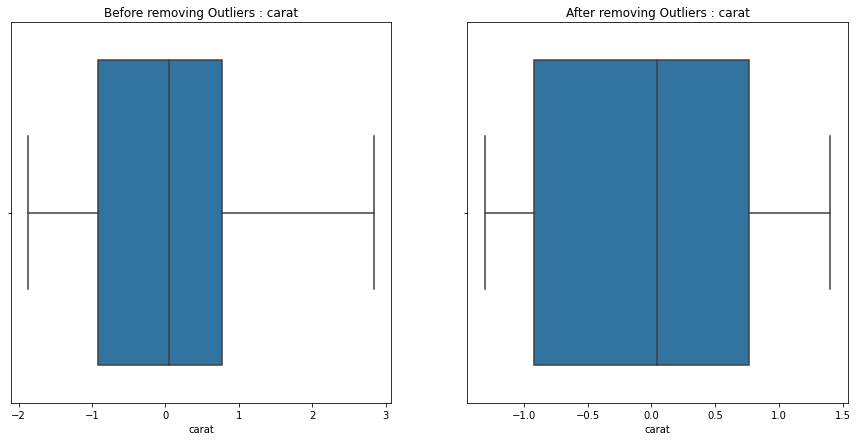

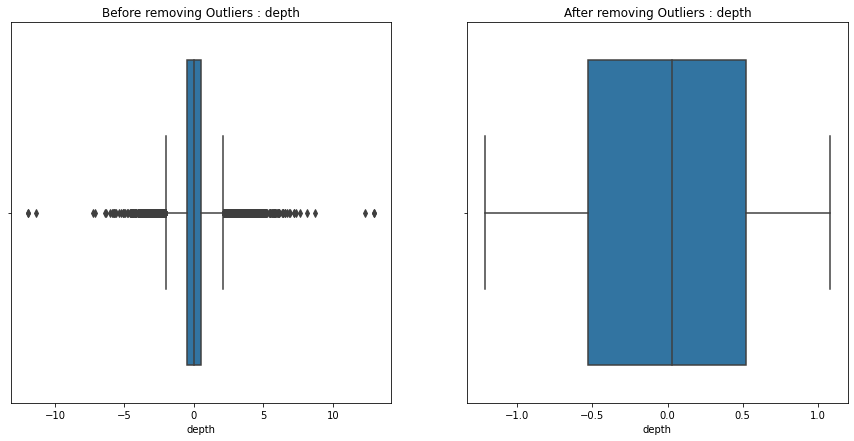

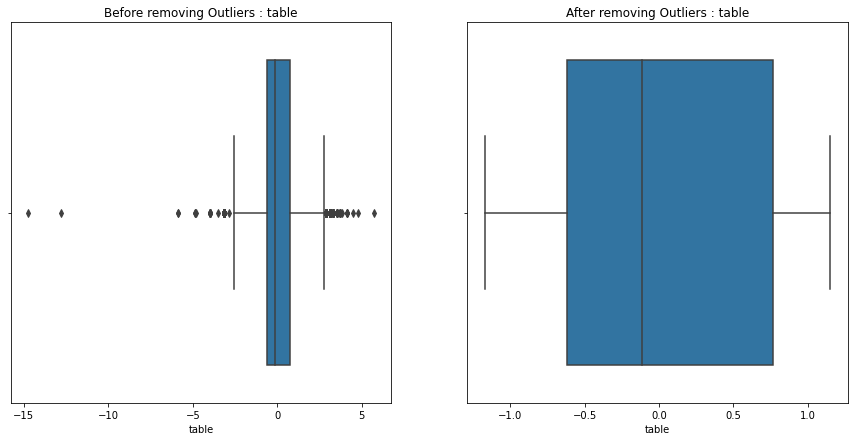

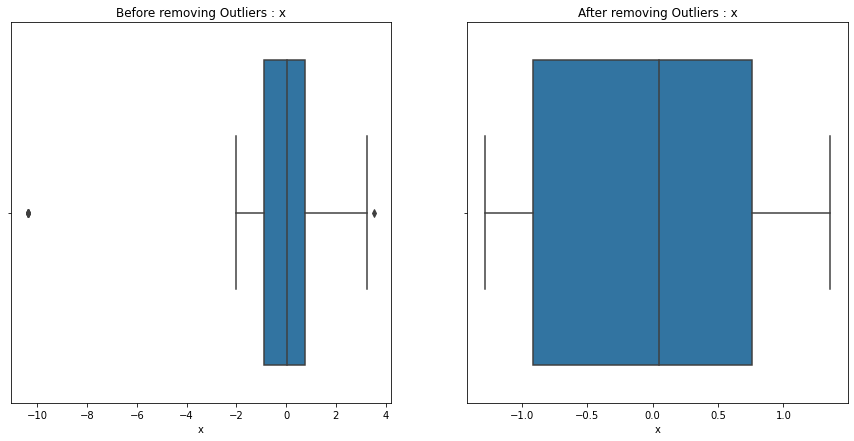

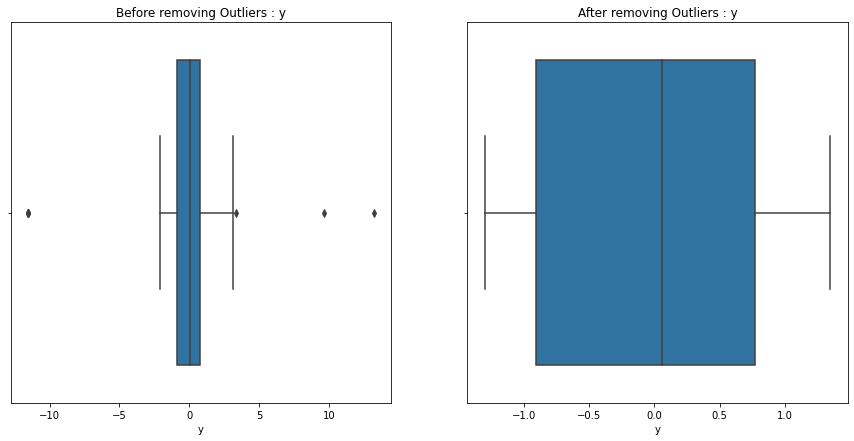

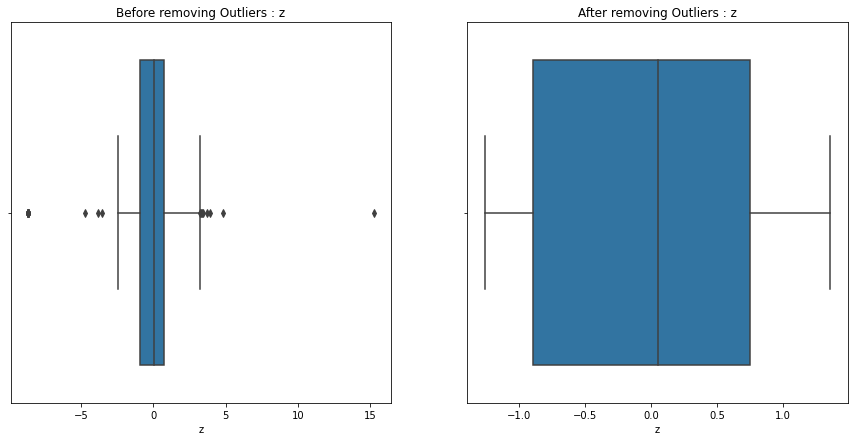

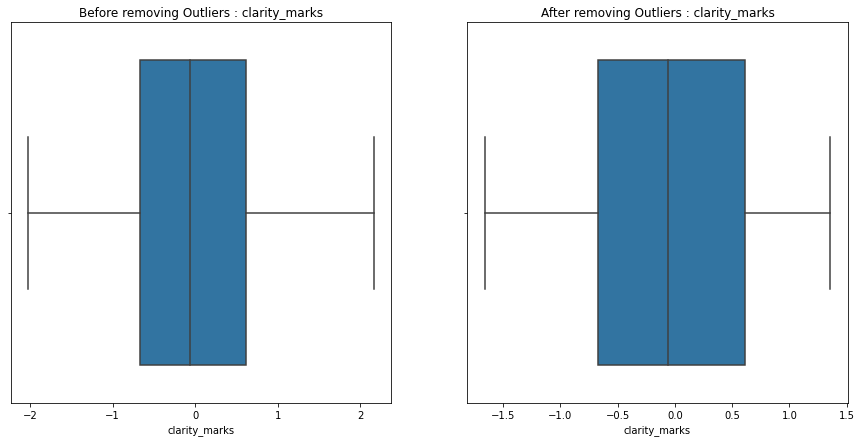

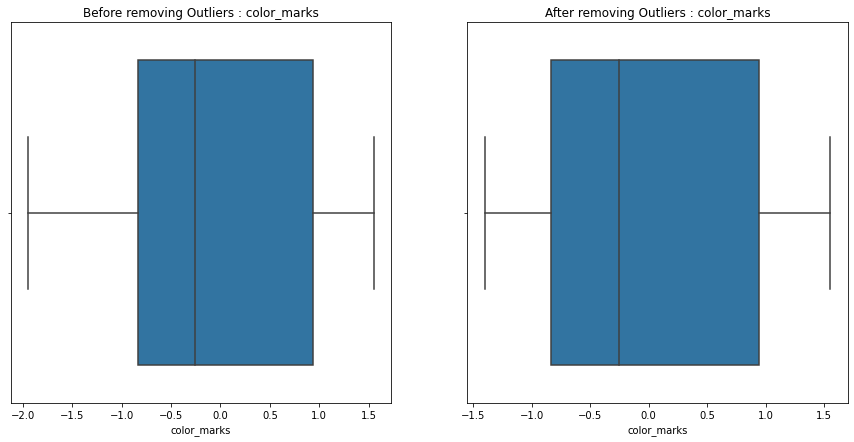

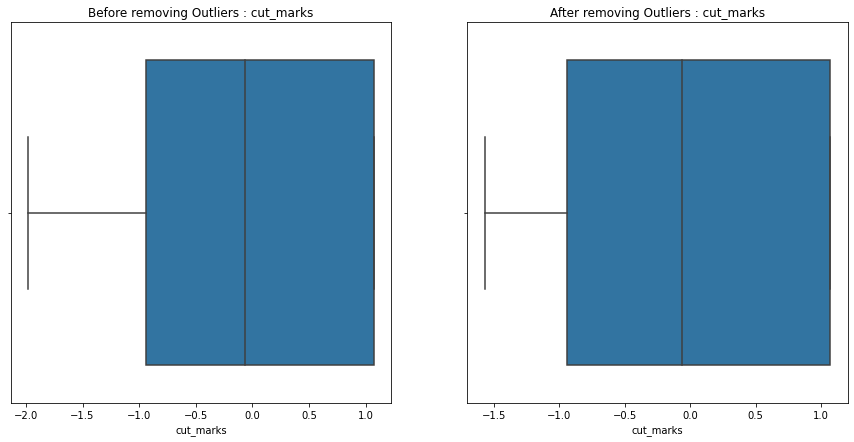

In [38]:
for i in x1.columns:
    plot_bef_after_outliers(i)

# Splitting the Data

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split( x1,y, test_size=0.25, random_state=0)


In [40]:
print(x_train.shape, x_test.shape)

(40455, 9) (13485, 9)


In [41]:
print(y_train.shape, y_test.shape)

(40455,) (13485,)


# Sklearn KNN Model

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

### Choosing a k Value

In [43]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn, x_train,y_train, cv=10,verbose=1)
    error_rate.append(1- score.mean())
error_rate

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[0.15192103469495366,
 0.11916789152892515,
 0.10821028242891795,
 0.10414258453824665,
 0.10196821866617756,
 0.10169012890777052,
 0.10075935135539316,
 0.10087406987025493,
 0.10056554421245656,
 0.10021162218520963,
 0.0999061086452715,
 0.09924992654630871,
 0.09931135933622992,
 0.0988432722816317,
 0.0988893843326808,
 0.09868572375139661,
 0.09885168974770164,
 0.0988928065002046,
 0.09900812988069752,
 0.09909559665306333,
 0.09921240669518527,
 0.09941368653273375,
 0.09961238026221175,
 0.09968333785846306,
 0.09968899547969579,
 0.09954643124282936,
 0.09961320150442976,
 0.09987565327212578,
 0.10000903993746069,
 0.10030950756896484,
 0.10037029136476006,
 0.1004921218114484,
 0.10067098898376314,
 0.1007815958049052,
 0.10080479575953516,
 0.10081625591640986,
 0.10104560615233638,
 0.10122237899761033,
 0.10132326049692941]

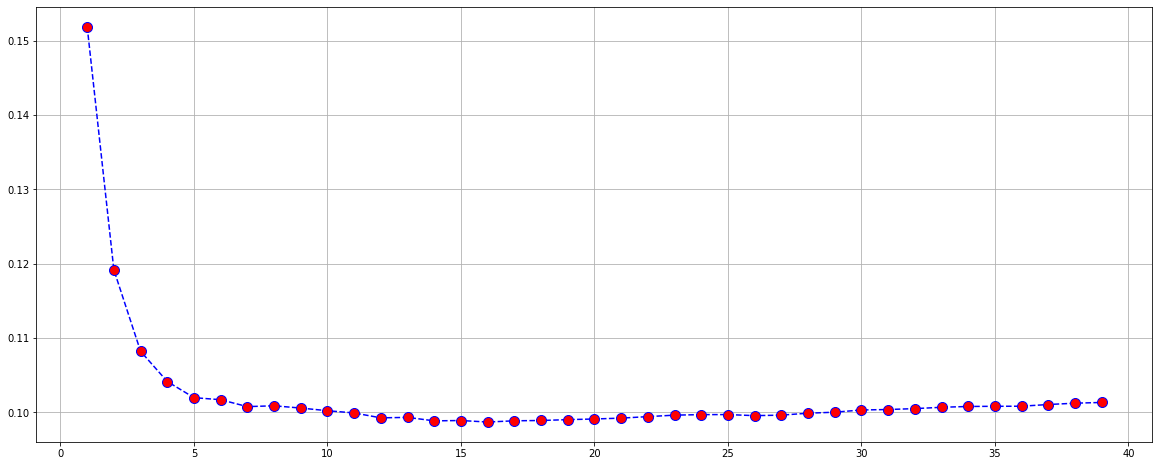

In [44]:
plt.figure(figsize=(20,8))
plt.grid()
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.show()

We Observed that at K=15 , error is minimum . So we can choose value 15 or around it.

In [45]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [46]:
knn=KNeighborsRegressor(n_neighbors=15)
knn.fit(x_train, y_train)

pred=knn.predict(x_test)


In [47]:
print('R2 Score is : ', r2_score(pred, y_test))
print('Mean Absolute error  is : ', mean_absolute_error(pred, y_test))
print('Root Mean Squred error is : ', np.sqrt(mean_squared_error(pred, y_test)))


R2 Score is :  0.8906552611244801
Mean Absolute error  is :  565.8372858731925
Root Mean Squred error is :  1247.7197479082852


In [59]:
x_train.describe()

,carat,depth,table,x,y,z,clarity_marks,color_marks,cut_marks
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,-0.016560,0.005419,-0.011726,-0.020870,-0.021270,-0.020593,0.001054,0.032586,0.014450
std,0.941482,0.707051,0.799826,0.910928,0.911425,0.903478,0.957651,0.951182,0.978606
min,-1.307720,-1.218594,-1.173375,-1.283085,-1.299647,-1.264124,-1.661944,-1.402500,-1.571891
25%,-0.919557,-0.458708,-0.620786,-0.909228,-0.905525,-0.896988,-0.673059,-0.837425,-0.938857
50%,0.046269,0.098762,-0.116598,0.037547,0.061474,0.037340,-0.064321,-0.256991,-0.062921
75%,0.762845,0.519518,0.765859,0.762651,0.767199,0.753702,0.613897,0.939592,1.072508
max,1.401980,1.084044,1.152393,1.358666,1.347854,1.361921,1.357890,1.552459,1.072508


# Building KNN Model

In [63]:
class KNN_Regression:
    def __init__(self,k):
        self.k=k
    def fit_func(self,x,y):
        self.x=np.asarray(x)
        self.y=np.asarray(y)

    def knn_regressor(self,x):
        x=np.asarray(x)
        predict=[]

        for i in x:
            dist=np.sqrt( np.sum( ( i-self.x)**2 , axis=1))
            sort_value=dist.argsort()
            sort_value=sort_value[:self.k]
            predict.append(np.mean(self.y[sort_value]))
        return np.array(predict)

model1=KNN_Regression(k=15)
model1.fit_func(x_train,y_train)
y_pred1= model1.knn_regressor(x_test)




In [64]:
y_pred1

array([4592.2       , 6466.8       , 5096.73333333, ..., 3369.2       ,
       3004.6       , 1370.33333333])

In [65]:
print('R2 Score is : ', r2_score(y_pred1, y_test))
print('Mean Absolute error  is : ', mean_absolute_error(y_pred1, y_test))
print('Root Mean Squred error is : ', np.sqrt(mean_squared_error(y_pred1, y_test)))

R2 Score is :  0.8910101266659988
Mean Absolute error  is :  565.1575132863676
Root Mean Squred error is :  1245.4634722385185
